In [1]:
import gc
import math
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from apk_analysis.dataset import load_dataset, get_dataset_path

sns.set_theme()


C:\Users\xfy93\miniconda3\envs\project\Lib\site-packages\cupy\_environment.py:214: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(


In [34]:
DATASET_DIR = os.path.join(".", "resources", "dataset")
PD_CACHE_DIR = os.path.join(".", "resources", "pd_cache")

PRIVACY_TYPES_DIR = os.path.join(DATASET_DIR, "privacy_types")
DATA_PROTECTION_TYPES_DIR = os.path.join(DATASET_DIR, "data_protection_types")

COSINE_DATASET_FILE = "cosine_dataset"
N_GRAM_JACCARD_DATASET_FILE = "n_gram_jaccard_dataset"
N_GRAM_DATASET_FILE = "n_gram_dataset"
TRANSFORMER_DATASET_FILE = "transformer_dataset"

DUMP_PICKLE = True
REPLACE_OLD_PLOT = True


In [3]:
def get_dataset(type_dir: str, file_name: str) -> pd.DataFrame:
    if not os.path.exists(PD_CACHE_DIR):
        os.makedirs(PD_CACHE_DIR)
    cache_path = os.path.join(PD_CACHE_DIR, os.path.basename(type_dir) + "_" + file_name + ".pd")
    if os.path.exists(cache_path):
        return pd.read_pickle(cache_path)
    else:
        dataset = load_dataset(get_dataset_path(type_dir, file_name, DUMP_PICKLE))
        df = dataset.to_pandas()
        df.to_pickle(cache_path)
        return df


In [4]:
def save_plt(name: str, prefix: str = "strings", dir_path: str = "figures", save_format: str = "pdf"):
    if not os.path.exists(dir_path):
        os.makedirs(dir_path)
    fig_path = os.path.join(dir_path, f"{prefix}_{name}.{save_format}")
    if REPLACE_OLD_PLOT or not os.path.exists(fig_path):
        plt.savefig(fig_path, format=save_format, bbox_inches="tight")


In [37]:
def plot_categories(df: pd.DataFrame, name: str):
    df.plot(kind="box", subplots=True, sharex='all', sharey='all', layout=(math.ceil(df.columns.size / 5), 5), figsize=(14, 10))
    plt.tight_layout()
    save_plt(name, save_format="png")
    plt.show()


In [38]:
def plot_all(types_dir: str, prefix: str):
    df = get_dataset(types_dir, COSINE_DATASET_FILE)
    plot_categories(df, f"similarity_{prefix}_cosine")
    del df
    gc.collect()

    df = get_dataset(types_dir, N_GRAM_DATASET_FILE)
    plot_categories(df, f"similarity_{prefix}_n_gram")
    del df
    gc.collect()

    df = get_dataset(types_dir, N_GRAM_JACCARD_DATASET_FILE)
    plot_categories(df, f"similarity_{prefix}_n_gram_jaccard")
    del df
    gc.collect()

    df = get_dataset(types_dir, TRANSFORMER_DATASET_FILE)
    plot_categories(df, f"similarity_{prefix}_transformer")
    del df
    gc.collect()


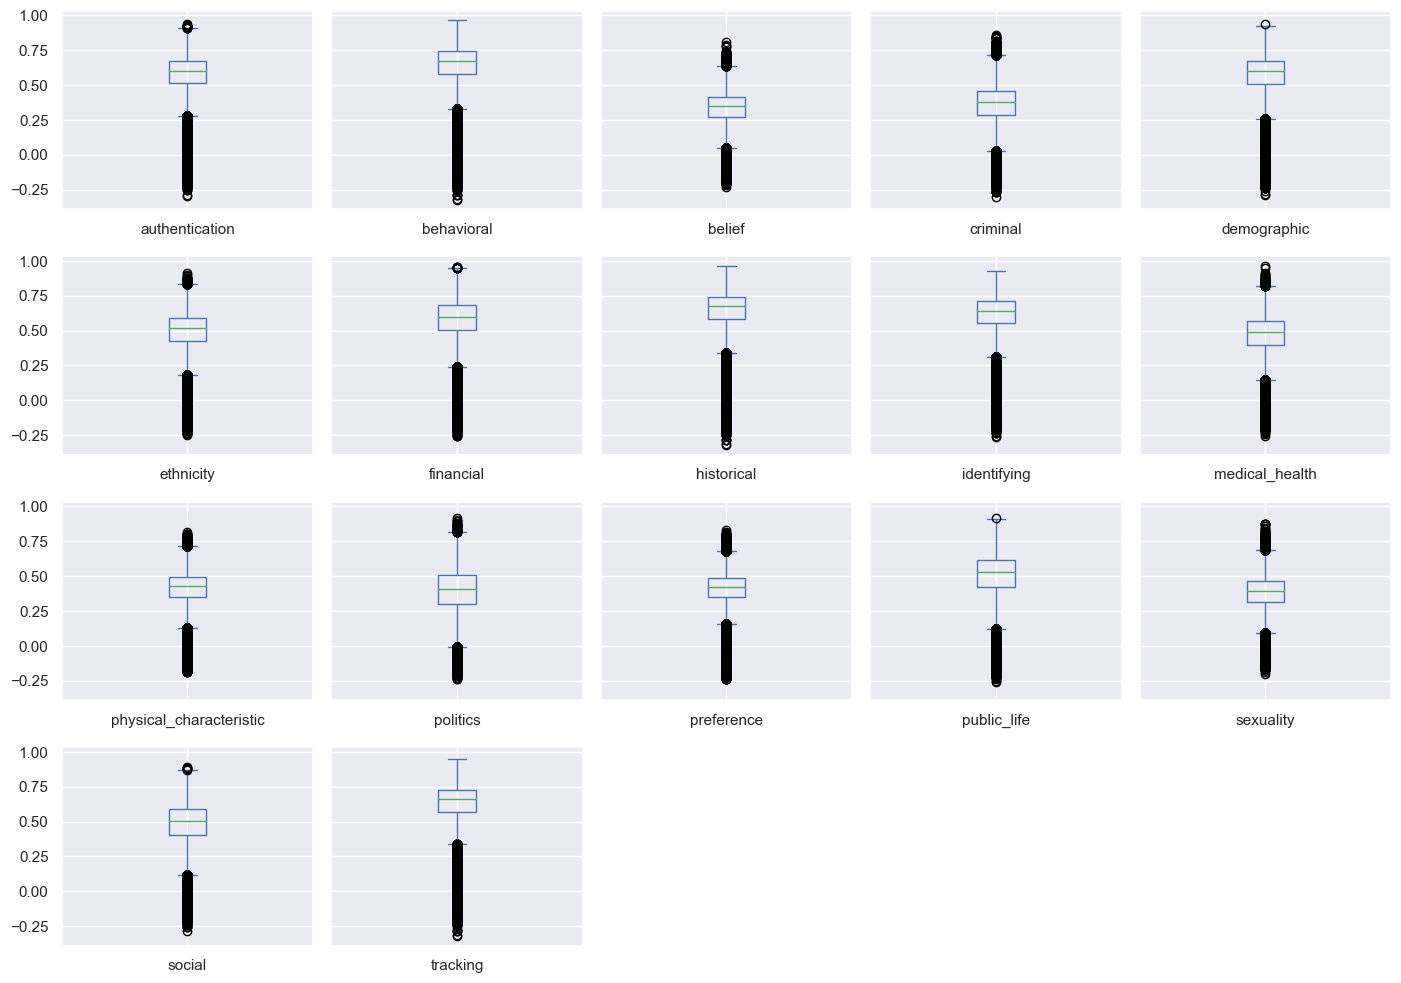

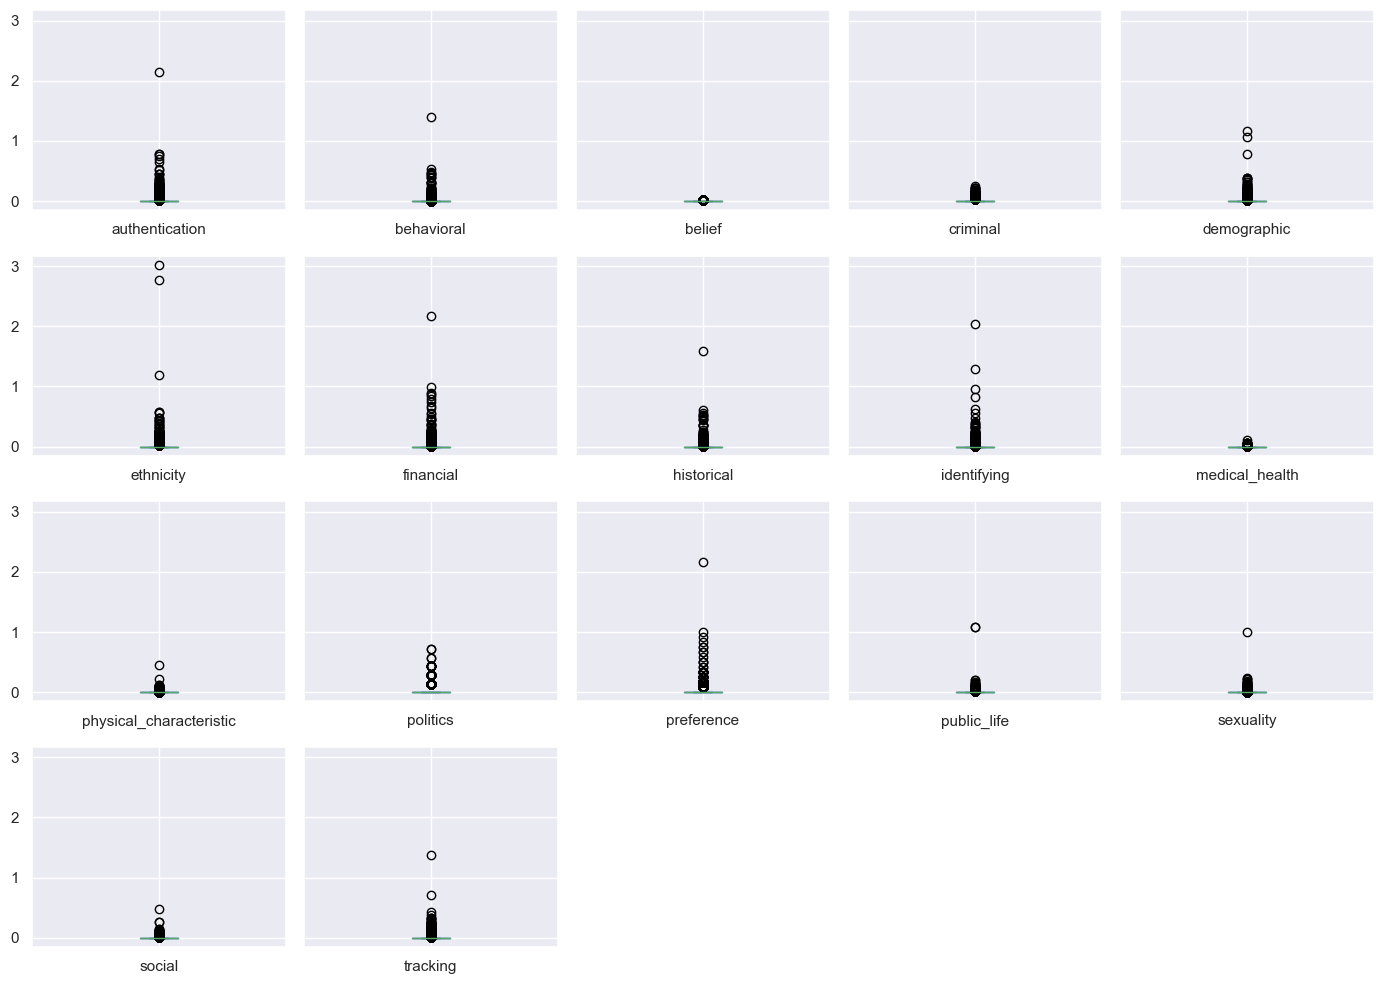

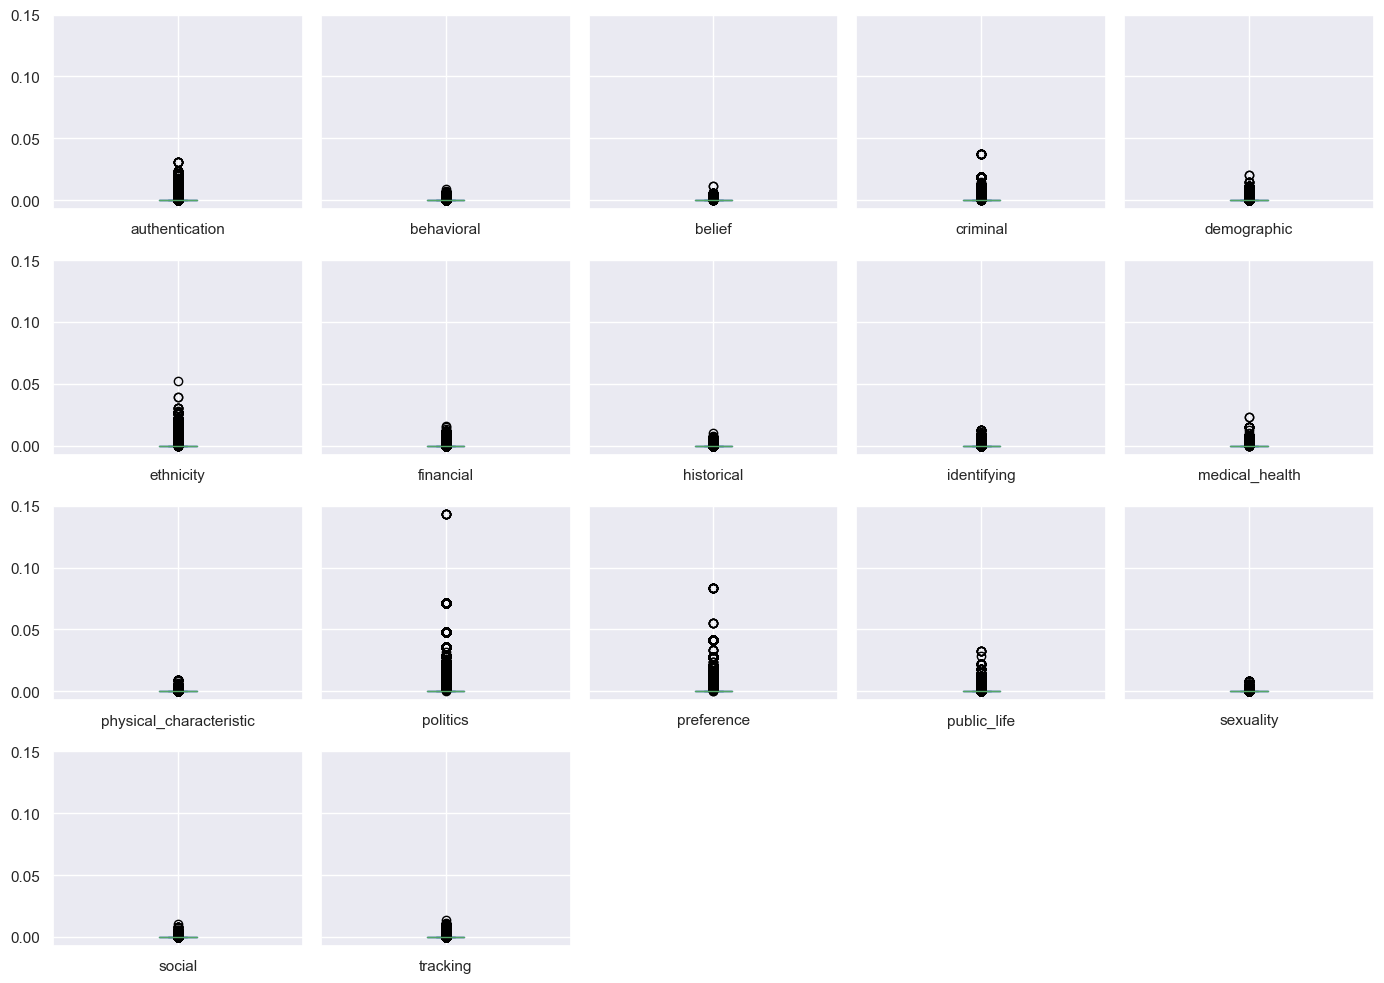

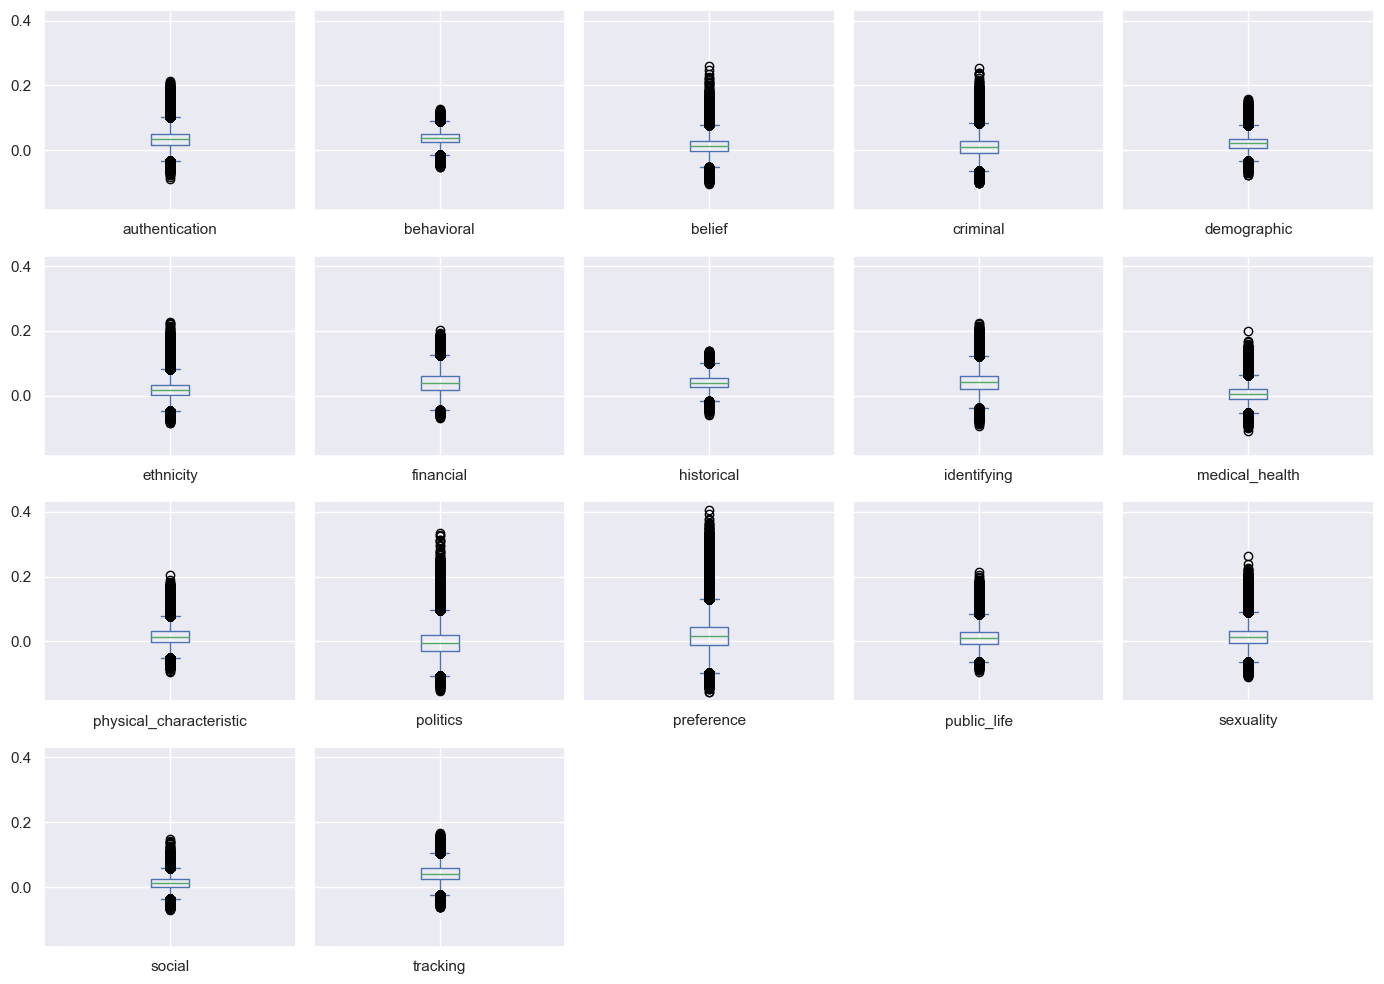

In [39]:
plot_all(PRIVACY_TYPES_DIR, "privacy_types")


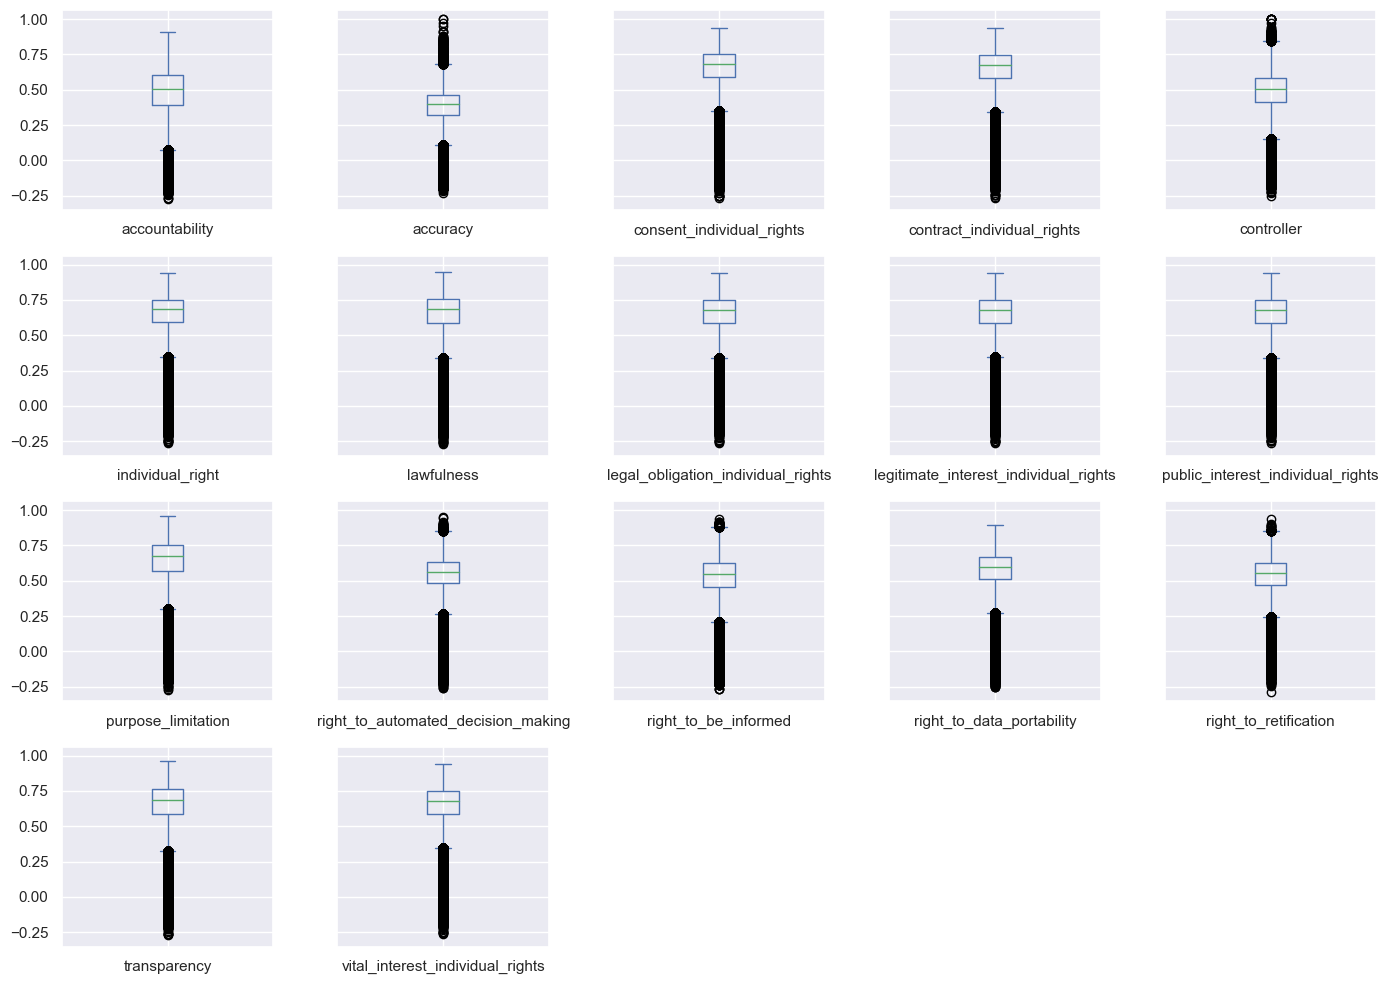

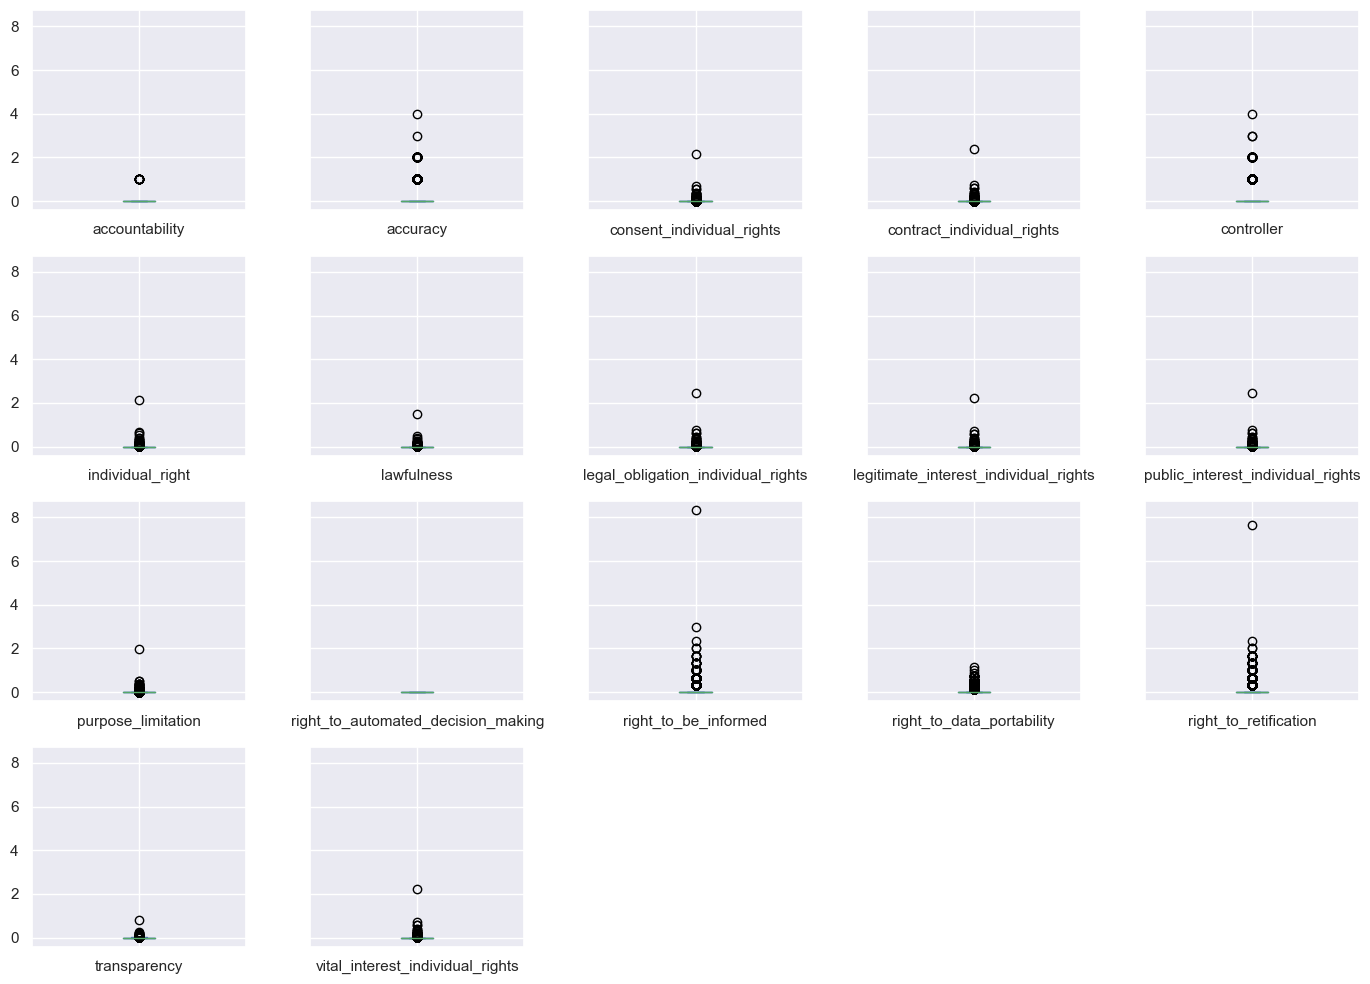

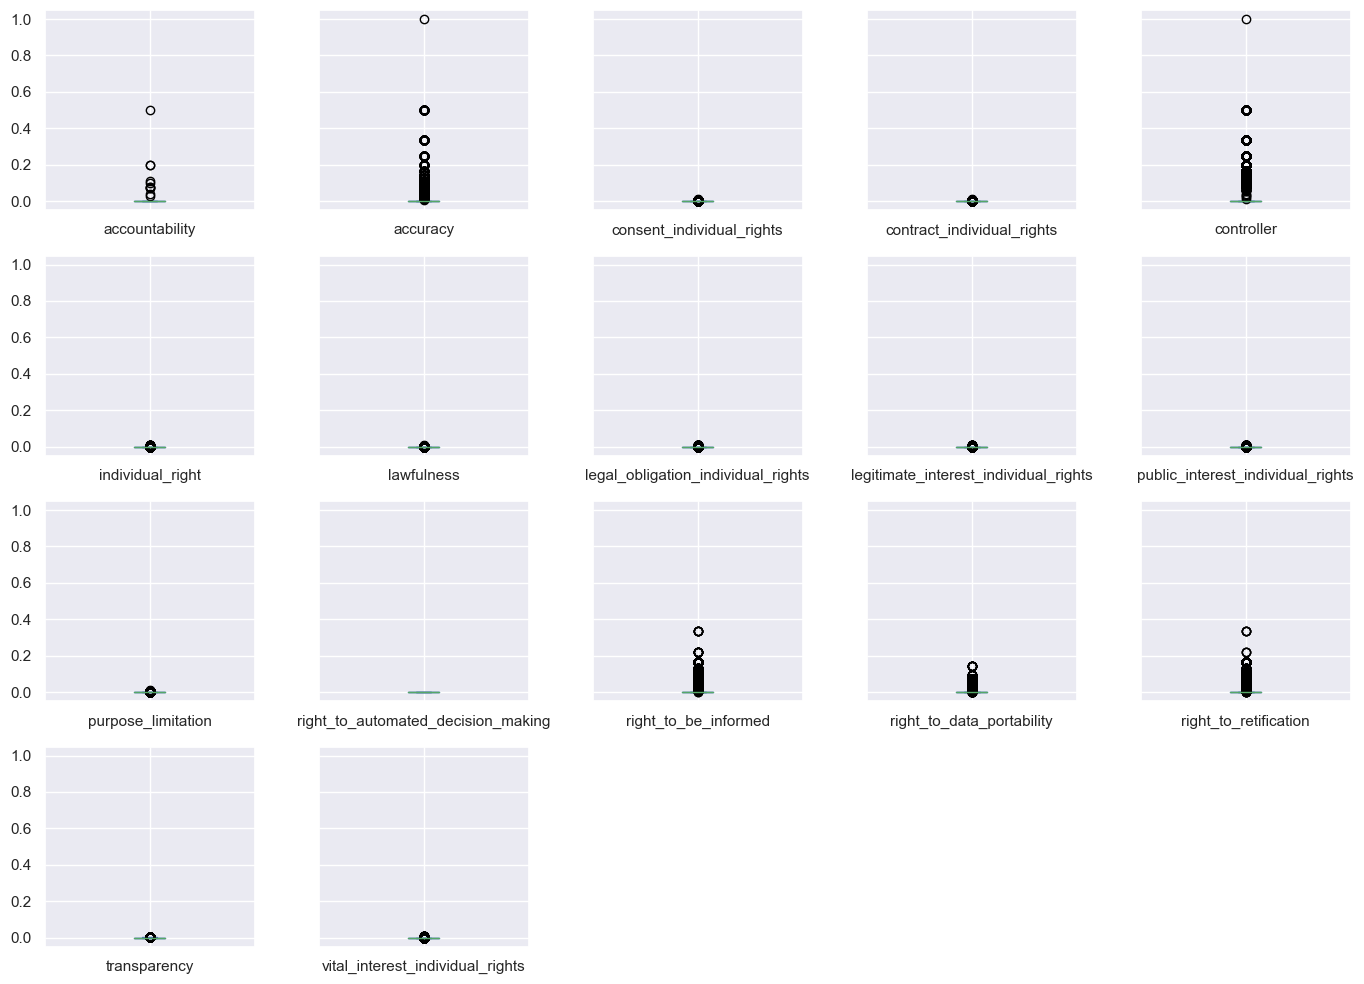

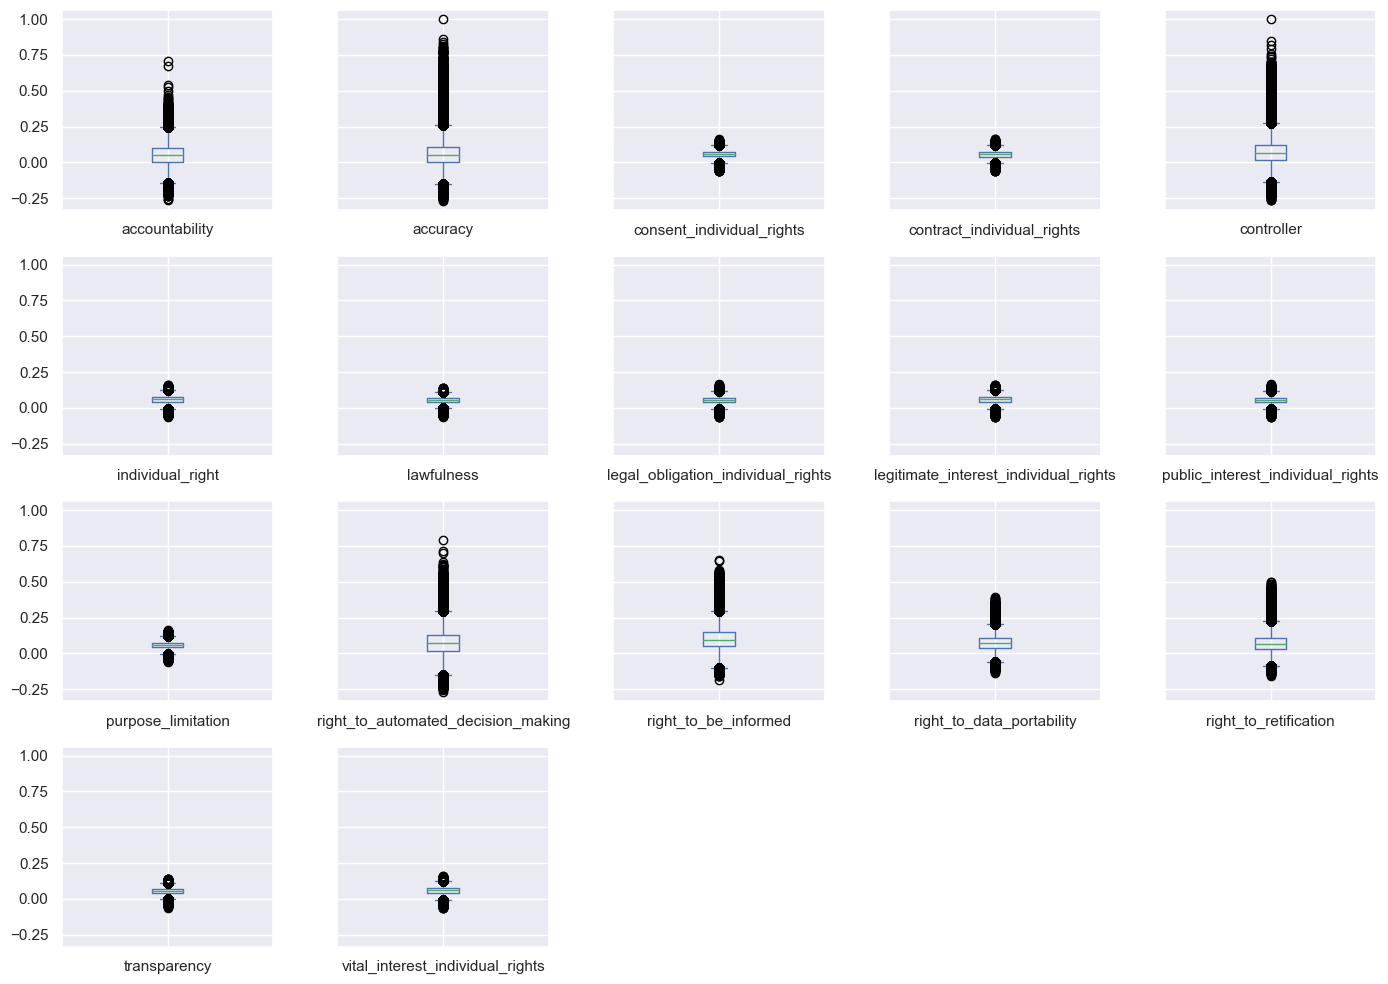

In [40]:
plot_all(DATA_PROTECTION_TYPES_DIR, "data_protection_types")
